### CHAPTER 5

TENSORFLOW

In [50]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.utils import to_categorical
import numpy as np
import logging

tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(7)

EPOCHS = 20
BATCH_SIZE = 1

In [51]:
# Load training and test datasets.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Standardize the data
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [52]:
# Check the encoding
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### The Network

In [6]:
# Initialize weights
initializer = keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)

# A sequential model
# 784 inputs
# Two dense (fully connected) layers with 25 neurons and 10 neurons
# Hidden Layer: Activation (tanh)
# Output Layer: Activation (Logistic function)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 784
    keras.layers.Dense(25, activation='tanh',kernel_initializer=initializer,bias_initializer='zeros'), 
    keras.layers.Dense(10, activation='sigmoid', kernel_initializer=initializer, bias_initializer='zeros')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Using stochastic gradient descent (SDG)
# Learning rate: 0.01 
# Loss function: MSE
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

# Model training
# Epochs: 20
# Update weights after each example or batch of examples.
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True
)

Epoch 1/20
60000/60000 - 25s - loss: 0.0493 - accuracy: 0.7168 - val_loss: 0.0242 - val_accuracy: 0.9007
Epoch 2/20
60000/60000 - 27s - loss: 0.0200 - accuracy: 0.9038 - val_loss: 0.0165 - val_accuracy: 0.9185
Epoch 3/20
60000/60000 - 28s - loss: 0.0158 - accuracy: 0.9161 - val_loss: 0.0143 - val_accuracy: 0.9238
Epoch 4/20
60000/60000 - 28s - loss: 0.0141 - accuracy: 0.9230 - val_loss: 0.0132 - val_accuracy: 0.9256
Epoch 5/20
60000/60000 - 31s - loss: 0.0130 - accuracy: 0.9279 - val_loss: 0.0124 - val_accuracy: 0.9286
Epoch 6/20
60000/60000 - 30s - loss: 0.0123 - accuracy: 0.9312 - val_loss: 0.0119 - val_accuracy: 0.9317
Epoch 7/20
60000/60000 - 32s - loss: 0.0117 - accuracy: 0.9340 - val_loss: 0.0115 - val_accuracy: 0.9333
Epoch 8/20
60000/60000 - 38s - loss: 0.0113 - accuracy: 0.9365 - val_loss: 0.0112 - val_accuracy: 0.9343
Epoch 9/20
60000/60000 - 38s - loss: 0.0109 - accuracy: 0.9383 - val_loss: 0.0110 - val_accuracy: 0.9370
Epoch 10/20
60000/60000 - 32s - loss: 0.0105 - accuracy

In [60]:
### Configuration 5 Example
# Enploying different techniques to counter vanishing and or exploding gradients.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(25, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

# Faster optimizers
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Model training
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=20, batch_size=64,
    verbose=2, shuffle=True
)

Epoch 1/20
938/938 - 1s - loss: 0.3473 - accuracy: 0.8958 - val_loss: 0.2153 - val_accuracy: 0.9389
Epoch 2/20
938/938 - 1s - loss: 0.2007 - accuracy: 0.9424 - val_loss: 0.1827 - val_accuracy: 0.9468
Epoch 3/20
938/938 - 1s - loss: 0.1685 - accuracy: 0.9510 - val_loss: 0.1649 - val_accuracy: 0.9498
Epoch 4/20
938/938 - 1s - loss: 0.1453 - accuracy: 0.9574 - val_loss: 0.1532 - val_accuracy: 0.9546
Epoch 5/20
938/938 - 1s - loss: 0.1331 - accuracy: 0.9604 - val_loss: 0.1405 - val_accuracy: 0.9592
Epoch 6/20
938/938 - 1s - loss: 0.1215 - accuracy: 0.9640 - val_loss: 0.1444 - val_accuracy: 0.9580
Epoch 7/20
938/938 - 1s - loss: 0.1122 - accuracy: 0.9663 - val_loss: 0.1436 - val_accuracy: 0.9581
Epoch 8/20
938/938 - 1s - loss: 0.1049 - accuracy: 0.9688 - val_loss: 0.1342 - val_accuracy: 0.9622
Epoch 9/20
938/938 - 1s - loss: 0.0983 - accuracy: 0.9704 - val_loss: 0.1400 - val_accuracy: 0.9605
Epoch 10/20
938/938 - 1s - loss: 0.0923 - accuracy: 0.9714 - val_loss: 0.1419 - val_accuracy: 0.9617

PYTORCH

In [1]:
import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as T
from torchvision.datasets import MNIST 
from torch.utils.data import DataLoader
import numpy as np 
torch.manual_seed(7)

In [68]:
# Set 'GPU' or 'CPU' as the base device for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 20
# BATCH_SIZE = 1
BATCH_SIZE = 64

In [69]:
# Load the training set into a single batch to compute mean and stddev.
transform = T.Compose([T.ToTensor()])
# Helper MNIST object for calculating the mean and stddev using the batch_size the size of the train dataset.
trainset = MNIST(root='./data/pt_mnist', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=True)
# Load all the data to calculate the mean and standard deviation to scale and center the dataset.
data = next(iter(trainloader))

In [70]:
nn.functional.one_hot(data[1][0], num_classes=10)

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [71]:
mean = data[0].mean()
stddev = data[0].std()

In [72]:
# Standardize data on loading.
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=mean, std=stddev)
])
trainset = MNIST(root="./data/pt_mnist", train=True, download=True, transform=transform)
testset = MNIST(root="./data/pt_mnist", train=True, download=True, transform=transform)

In [31]:
# A sequential model
# 784 inputs
# Two dense (fully connected) layers with 25 neurons and 10 neurons
# Hidden Layer: Activation (tanh)
# Output Layer: Activation (Logistic function)
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 25), 
    nn.Tanh(), 
    nn.Linear(25, 10),
    nn.Sigmoid()
)

# Initialize weights
for module in model.modules():
    if isinstance(module, nn.Linear):
        # Initialize layer weights
        nn.init.uniform_(module.weight, a=-0.1, b=0.1)
        # Initialize bias weights
        nn.init.constant_(module.bias, 0.0)

In [32]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=25, bias=True)
  (2): Tanh()
  (3): Linear(in_features=25, out_features=10, bias=True)
  (4): Sigmoid()
)

In [37]:
### TRAINING
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_function = nn.MSELoss()

# Set to the supported device
model.to(device)

# Test and train loader
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

# Train the model
for i in range(EPOCHS):
    model.train() # Training mode 
    train_loss = 0.0 
    train_correct = 0
    train_batches = 0
    for inputs, targets in trainloader:
        # Move to the same device as model.
        one_hot_targets = nn.functional.one_hot(targets, num_classes=10).float()
        inputs, targets, one_hot_targets = inputs.to(device), targets.to(device), one_hot_targets.to(device)
        # Zero the parameter gradients.
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, one_hot_targets)
        # Accumulate metrics 
        _, indices = torch.max(outputs.data, 1)
        train_correct += (indices == targets).sum().item()
        train_batches += 1
        train_loss += loss.item()
        # Backward pass and update
        loss.backward()
        optimizer.step()

    train_loss = train_loss / train_batches
    train_acc = train_correct / (train_batches * BATCH_SIZE)

    # Evaluate the model
    model.eval() # Set model to inference mode.
    test_loss = 0.0
    test_correct = 0
    test_batches = 0
    for inputs, targets in testloader:
        one_hot_targets = nn.functional.one_hot(targets, num_classes=10)
        inputs, targets, one_hot_targets = inputs.to(device), targets.to(device), one_hot_targets.to(device)
        outputs = model(inputs)
        loss = loss_function(outputs, one_hot_targets)
        _, indices = torch.max(outputs, 1)
        test_correct += (indices == targets).sum().item()
        test_batches += 1
        test_loss += loss.item()

    test_loss = test_loss / test_batches 
    test_acc = test_correct / (test_batches * BATCH_SIZE)

    print(f'Epoch {i+1}/{EPOCHS} loss: {train_loss:.4f} - acc: {train_acc:0.4f} - val_loss: {test_loss:.4f} - val_acc: {test_acc:0.4f}')

Epoch 1/20 loss: 0.0537 - acc: 0.6797 - val_loss: 0.0273 - val_acc: 0.8800
Epoch 2/20 loss: 0.0217 - acc: 0.8952 - val_loss: 0.0180 - val_acc: 0.9081
Epoch 3/20 loss: 0.0167 - acc: 0.9114 - val_loss: 0.0154 - val_acc: 0.9163
Epoch 4/20 loss: 0.0147 - acc: 0.9186 - val_loss: 0.0139 - val_acc: 0.9229
Epoch 5/20 loss: 0.0136 - acc: 0.9231 - val_loss: 0.0129 - val_acc: 0.9277
Epoch 6/20 loss: 0.0129 - acc: 0.9263 - val_loss: 0.0122 - val_acc: 0.9303
Epoch 7/20 loss: 0.0123 - acc: 0.9290 - val_loss: 0.0119 - val_acc: 0.9323
Epoch 8/20 loss: 0.0118 - acc: 0.9319 - val_loss: 0.0114 - val_acc: 0.9348
Epoch 9/20 loss: 0.0115 - acc: 0.9332 - val_loss: 0.0110 - val_acc: 0.9371
Epoch 10/20 loss: 0.0111 - acc: 0.9353 - val_loss: 0.0108 - val_acc: 0.9383
Epoch 11/20 loss: 0.0109 - acc: 0.9368 - val_loss: 0.0105 - val_acc: 0.9390
Epoch 12/20 loss: 0.0107 - acc: 0.9374 - val_loss: 0.0104 - val_acc: 0.9401
Epoch 13/20 loss: 0.0104 - acc: 0.9392 - val_loss: 0.0100 - val_acc: 0.9412
Epoch 14/20 loss: 0.0

In [76]:
### Configuration 5 Example
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 25),
    nn.ReLU(),
    nn.Linear(25, 10)
)

# Retrieve layers for custom weight initialization
layers = next(model.modules())
hidden_layer = layers[1]
output_layer = layers[3]

# Kaiming (He) intialization
nn.init.kaiming_normal_(hidden_layer.weight)
nn.init.constant_(hidden_layer.bias, 0.0)

# Xavier (Glorot) initialization
nn.init.xavier_uniform_(output_layer.weight)
nn.init.constant_(output_layer.bias, 0.0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [77]:
### TRAINING (Configuration 5)
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

# Set to the supported device
model.to(device)

# Test and train loader
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

# Train the model
for i in range(EPOCHS):
    model.train() # Training mode 
    train_loss = 0.0 
    train_correct = 0
    train_batches = 0
    for inputs, targets in trainloader:
        # Move to the same device as model.
        # one_hot_targets = nn.functional.one_hot(targets, num_classes=10).float()
        # Cross entropy does not need one-hot targets in Pytorch.
        inputs, targets = inputs.to(device), targets.to(device) # one_hot_targets.to(device)
        # Zero the parameter gradients.
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        # Accumulate metrics 
        _, indices = torch.max(outputs.data, 1)
        train_correct += (indices == targets).sum().item()
        train_batches += 1
        train_loss += loss.item()
        # Backward pass and update
        loss.backward()
        optimizer.step()

    train_loss = train_loss / train_batches
    train_acc = train_correct / (train_batches * BATCH_SIZE)

    # Evaluate the model
    model.eval() # Set model to inference mode.
    test_loss = 0.0
    test_correct = 0
    test_batches = 0
    for inputs, targets in testloader:
        # one_hot_targets = nn.functional.one_hot(targets, num_classes=10)
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        _, indices = torch.max(outputs, 1)
        test_correct += (indices == targets).sum().item()
        test_batches += 1
        test_loss += loss.item()

    test_loss = test_loss / test_batches 
    test_acc = test_correct / (test_batches * BATCH_SIZE)

    print(f'Epoch {i+1}/{EPOCHS} loss: {train_loss:.4f} - acc: {train_acc:0.4f} - val_loss: {test_loss:.4f} - val_acc: {test_acc:0.4f}')

Epoch 1/20 loss: 0.3758 - acc: 0.8869 - val_loss: 0.2044 - val_acc: 0.9400
Epoch 2/20 loss: 0.1923 - acc: 0.9433 - val_loss: 0.1714 - val_acc: 0.9490
Epoch 3/20 loss: 0.1588 - acc: 0.9521 - val_loss: 0.1306 - val_acc: 0.9613
Epoch 4/20 loss: 0.1384 - acc: 0.9584 - val_loss: 0.1215 - val_acc: 0.9640
Epoch 5/20 loss: 0.1230 - acc: 0.9632 - val_loss: 0.1010 - val_acc: 0.9696
Epoch 6/20 loss: 0.1124 - acc: 0.9666 - val_loss: 0.0949 - val_acc: 0.9711
Epoch 7/20 loss: 0.1033 - acc: 0.9684 - val_loss: 0.0985 - val_acc: 0.9691
Epoch 8/20 loss: 0.0967 - acc: 0.9704 - val_loss: 0.0951 - val_acc: 0.9699
Epoch 9/20 loss: 0.0914 - acc: 0.9718 - val_loss: 0.0758 - val_acc: 0.9767
Epoch 10/20 loss: 0.0855 - acc: 0.9730 - val_loss: 0.0751 - val_acc: 0.9769
Epoch 11/20 loss: 0.0827 - acc: 0.9741 - val_loss: 0.0756 - val_acc: 0.9767
Epoch 12/20 loss: 0.0793 - acc: 0.9753 - val_loss: 0.0736 - val_acc: 0.9762
Epoch 13/20 loss: 0.0740 - acc: 0.9763 - val_loss: 0.0644 - val_acc: 0.9790
Epoch 14/20 loss: 0.0

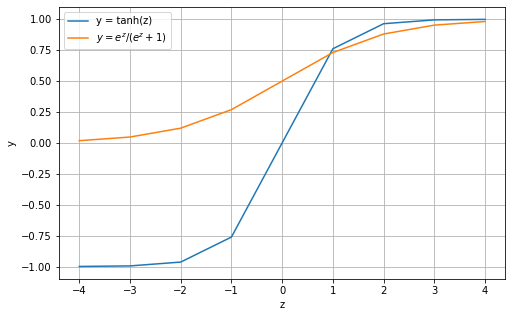

In [49]:
### PLOT ACTIVATION FUNCTIONS
import matplotlib.pyplot as plt
tanh = lambda z: np.tanh(z)
sigmoid = lambda z: np.exp(z) / (np.exp(z) + 1)
z = np.linspace(-4, 4, num=9)
plt.figure(figsize=(8,5))
plt.plot(z, tanh(z), label="y = tanh(z)")
plt.plot(z, sigmoid(z), label="$y = e^z/(e^z+1)$")
plt.xlabel("z")
plt.ylabel("y")
plt.grid(True)
plt.legend()

In [58]:
### Cross-Entropy function
def cross_entropy(y_pred, y_true):
    if y_true == 1.0:
        return -np.log(y_pred)
    else:
        return -np.log(1.0 - y_pred)

cross_ent = lambda y,y_hat: -np.log(y_hat) if y==1.0 else -np.log(1 - y_hat)